In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import os 

base_dir = 'D:\\College\\Semester8\\PraSemester\\MachineLearning_ImageClass\\ProjectSkripsi\\ImageClassificationWithoutOverfitting\\dataset'
train_dir = os.path.join(base_dir, 'cats_and_dogs')
#validation_dir = os.path.join(base_dir, 'test_set')


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    rotation_range=30,
                                    fill_mode='constant',
                                    shear_range=0.2,
                                    #brightness_range=[0.8, 1.2],
                                    zoom_range=0.2,
                                    validation_split=0.3
)

validation_datagen = ImageDataGenerator( rescale = 1.0/225, 
                                         validation_split=0.3
)


train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        color_mode='grayscale',
                                                        class_mode = 'binary',
                                                        shuffle=True,
                                                        subset='training')

validation_generator = validation_datagen.flow_from_directory( train_dir,
                                                                target_size = (64, 64),
                                                                batch_size = 32,
                                                                color_mode='grayscale',
                                                                class_mode = 'binary',
                                                                shuffle=True,
                                                                subset='validation')

Found 7000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(64, 64, 1), padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
219/219 [==============================] - 149s 677ms/step - loss: 0.8493 - accuracy: 0.5664 - val_loss: 0.6807 - val_accuracy: 0.5617
Epoch 2/10
219/219 [==============================] - 24s 108ms/step - loss: 0.6405 - accuracy: 0.6302 - val_loss: 0.6292 - val_accuracy: 0.6597
Epoch 3/10
219/219 [==============================] - 24s 109ms/step - loss: 0.6195 - accuracy: 0.6535 - val_loss: 0.6397 - val_accuracy: 0.6697
Epoch 4/10
219/219 [==============================] - 24s 110ms/step - loss: 0.5943 - accuracy: 0.6800 - val_loss: 0.5655 - val_accuracy: 0.7190
Epoch 5/10
219/219 [==============================] - 24s 111ms/step - loss: 0.5735 - accuracy: 0.7050 - val_loss: 0.5913 - val_accuracy: 0.7097
Epoch 6/10
219/219 [==============================] - 24s 111ms/step - loss: 0.5649 - accuracy: 0.7051 - val_loss: 0.5359 - val_accuracy: 0.7360
Epoch 7/10
219/219 [==============================] - 25s 114ms/step - loss: 0.5472 - accuracy: 0.7212 - val_loss: 0.6206 - val_a

Input Image is dog


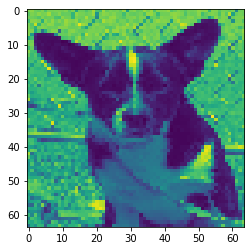

In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#test_image = image.load_img('cat.1.jpg',target_size=(64,64))
#test_image = image.load_img('cat.4062.jpg',target_size=(64,64))
#test_image = image.load_img('dog.4001.jpg',target_size=(64,64))
test_image = image.load_img('dog.4031.jpg',target_size=(64,64),color_mode='grayscale')
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result == 0 :
    print("Input Image is cat")
else:
    print("Input Image is dog")

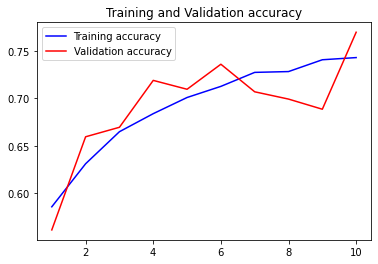

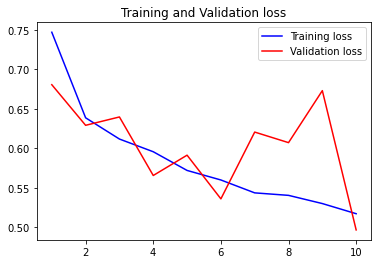

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(accuracy) + 1)

#Train and Validation accuracy
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and Validation loss
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()